In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [3]:
plt.rcParams["font.family"]="BM YEONSUNG"

In [4]:
D=pd.read_excel(r"C:\Users\SAMSUNG\Desktop\Projects\004_Regression\더했다간미워할거야.xlsx")

In [10]:
cols1=[x for x in D.columns if x.find("만족도")!=-1]
cols2=["삶의 사다리 점수","성별","연령","교육수준","종교"]

['가족생활에 대한 만족도',
 '(가)건강 만족도',
 '(나)가족의 수입 만족도',
 '(다)주거 환경 만족도',
 '(라)가족관계 만족도',
 '(마)직업 만족도',
 '(바)사회적 친분관계 만족도',
 '(사)여가생활 만족도']

In [12]:
data=pd.DataFrame(D[cols1+cols2])

## 데이터 분리

In [13]:
import sklearn.model_selection as sm

In [16]:
train_data,test_data=sm.train_test_split(data,stratify=data["삶의 사다리 점수"],train_size=0.7,random_state=3)

In [17]:
train_data

,가족생활에 대한 만족도,(가)건강 만족도,(나)가족의 수입 만족도,(다)주거 환경 만족도,(라)가족관계 만족도,(마)직업 만족도,(바)사회적 친분관계 만족도,(사)여가생활 만족도,삶의 사다리 점수,성별,연령,교육수준,종교
2501,6,4,3,4,4,4,4,3,6,2,78,3,0
3138,6,3,2,3,4,3,3,2,5,2,72,3,0
3288,6,2,3,4,4,4,4,3,6,2,73,2,0
3409,6,1,3,4,4,3,3,3,5,2,87,3,0
1000,6,2,2,3,3,3,3,3,6,1,53,6,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3331,6,4,4,4,4,4,4,4,8,2,64,5,0
149,6,4,2,4,4,3,4,3,9,2,85,7,0
364,6,4,4,4,4,4,3,4,7,1,83,5,0
656,4,1,3,3,3,3,2,2,3,1,84,3,0


<Axes: xlabel='삶의 사다리 점수', ylabel='count'>

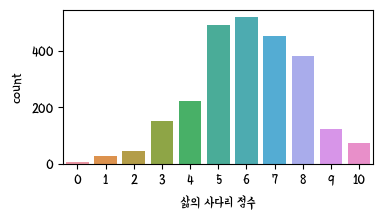

In [18]:
plt.figure(figsize=(4,2))
sb.countplot(data=train_data,x="삶의 사다리 점수")

<Axes: xlabel='삶의 사다리 점수', ylabel='count'>

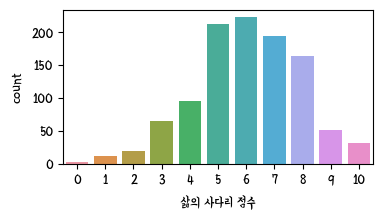

In [19]:
plt.figure(figsize=(4,2))
sb.countplot(data=test_data,x="삶의 사다리 점수")

# 회귀분석

In [20]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

### 종속,독립

In [21]:
y=train_data["삶의 사다리 점수"]
x=train_data[train_data.columns.difference(["삶의 사다리 점수"])]

In [22]:
pre_x=sm.add_constant(x)

In [23]:
model=sm.OLS(endog=y,exog=pre_x)
fit=model.fit()

In [24]:
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              삶의 사다리 점수   R-squared:                       0.392
Model:                            OLS   Adj. R-squared:                  0.389
Method:                 Least Squares   F-statistic:                     133.2
Date:                Thu, 10 Aug 2023   Prob (F-statistic):          3.01e-257
Time:                        15:17:52   Log-Likelihood:                -4461.8
No. Observations:                2496   AIC:                             8950.
Df Residuals:                    2483   BIC:                             9025.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -1.2409      0.340     -3.655      0.000      -1.907      -0.575
(가)건강 만족도           0.3012      0.036      8.481      0.000       0.232       0.371
(나)가족의 수입 만족도       0.1911      0.041      4.702      0.000       0.111       0.271
(다)주거 환경 만족도        0.2228      0.045      5.002      0.000       0.135       0.310
(라)가족관계 만족도         0.1872      0.055      3.410      0.001       0.080       0.295
(마)직업 만족도           0.3003      0.050      6.024      0.000       0.203       0.398
(바)사회적 친분관계 만족도     0.2883      0.055      5.215      0.000       0.180       0.397
(사)여가생활 만족도         0.3158      0.048      6.616      0.000       0.222       0.409
가족생활에 대한 만족도        0.1444      0.021      7.035      0.000       0.104       0.185
교육수준                0.0882      0.027      3.290      0.001       0.036       0.141
성별                  0.0008      0.072      0.012      0.991      -0.141       0.142
연령                  0.0027      0.002      1.147      0.251      -0.002       0.007
종교                 -0.0367      0.057     -0.643      0.520      -0.148       0.075
==============================================================================
Omnibus:                       13.703   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.210
Skew:                           0.052   Prob(JB):                     0.000111
Kurtosis:                       3.406   Cond. No.                         835.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
y

2501    6
3138    5
3288    6
3409    5
1000    6
       ..
3331    8
149     9
364     7
656     3
2281    4
Name: 삶의 사다리 점수, Length: 2496, dtype: int64

In [29]:
round(fit.fittedvalues)

2501    7.0
3138    5.0
3288    6.0
3409    5.0
1000    5.0
       ... 
3331    7.0
149     7.0
364     7.0
656     4.0
2281    4.0
Length: 2496, dtype: float64

### 모델 평가

In [105]:
test_y=test_data["삶의 사다리 점수"]
test_x=test_data[train_data.columns.difference(["삶의 사다리 점수"])]
test_x.drop("가구원수",axis=1,inplace=True)

C:\Users\SAMSUNG\AppData\Local\Temp\ipykernel_20908\3315617018.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_x.drop("가구원수",axis=1,inplace=True)


In [25]:
round(fit.predict(test_data[train_data.columns.difference(["삶의 사다리 점수"])]))

ValueError: shapes (1070,12) and (13,) not aligned: 12 (dim 1) != 13 (dim 0)

In [115]:
test_y

91      7
224     6
1611    6
1916    8
1413    7
       ..
3530    5
2946    6
794     8
255     6
990     8
Name: 삶의 사다리 점수, Length: 1086, dtype: int64